In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np


plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Computer Modern Roman"
plt.rcParams["font.sans-serif"] = "Computer Modern Sans serif"
plt.rcParams["text.usetex"] = True
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["legend.frameon"] = False
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

## Plot the Training Log

### Grab Data

In [2]:
log_file = "base_wmt14_de-en.log"


# load log file
with open(log_file, "r") as f:
    content = f.read().splitlines()

# parse log file
epoch_train, accu_train, loss_train, lr = [], [], [], []
epoch_valid, accu_valid, loss_valid, bleu_valid = [], [], [], []
sub_epoch = 0
for line in content:
    if "Epoch" in line:
        epoch_valid.append(int(line.split("Epoch")[1]))
        sub_epoch = 0
    elif "Lr" in line:
        sub_epoch += 1
        accu_train.append(float(line.split("Accuracy:")[1].split("%")[0]))
        loss_train.append(float(line.split("loss:")[1].split(",")[0]))
        lr.append(float(line.split("Lr:")[1].split("[")[0]))
    elif "Accuracy" in line:
        epoch_train.extend(epoch_valid[-1] - 1 + np.linspace(1 / sub_epoch, 1, sub_epoch))
        accu_valid.append(float(line.split("Accuracy:")[1].split("%")[0]))
        loss_valid.append(float(line.split("loss:")[1]))
    elif "BLEU score" in line:
        bleu_valid.append(float(line.split("BLEU score:")[1]))

### Plot

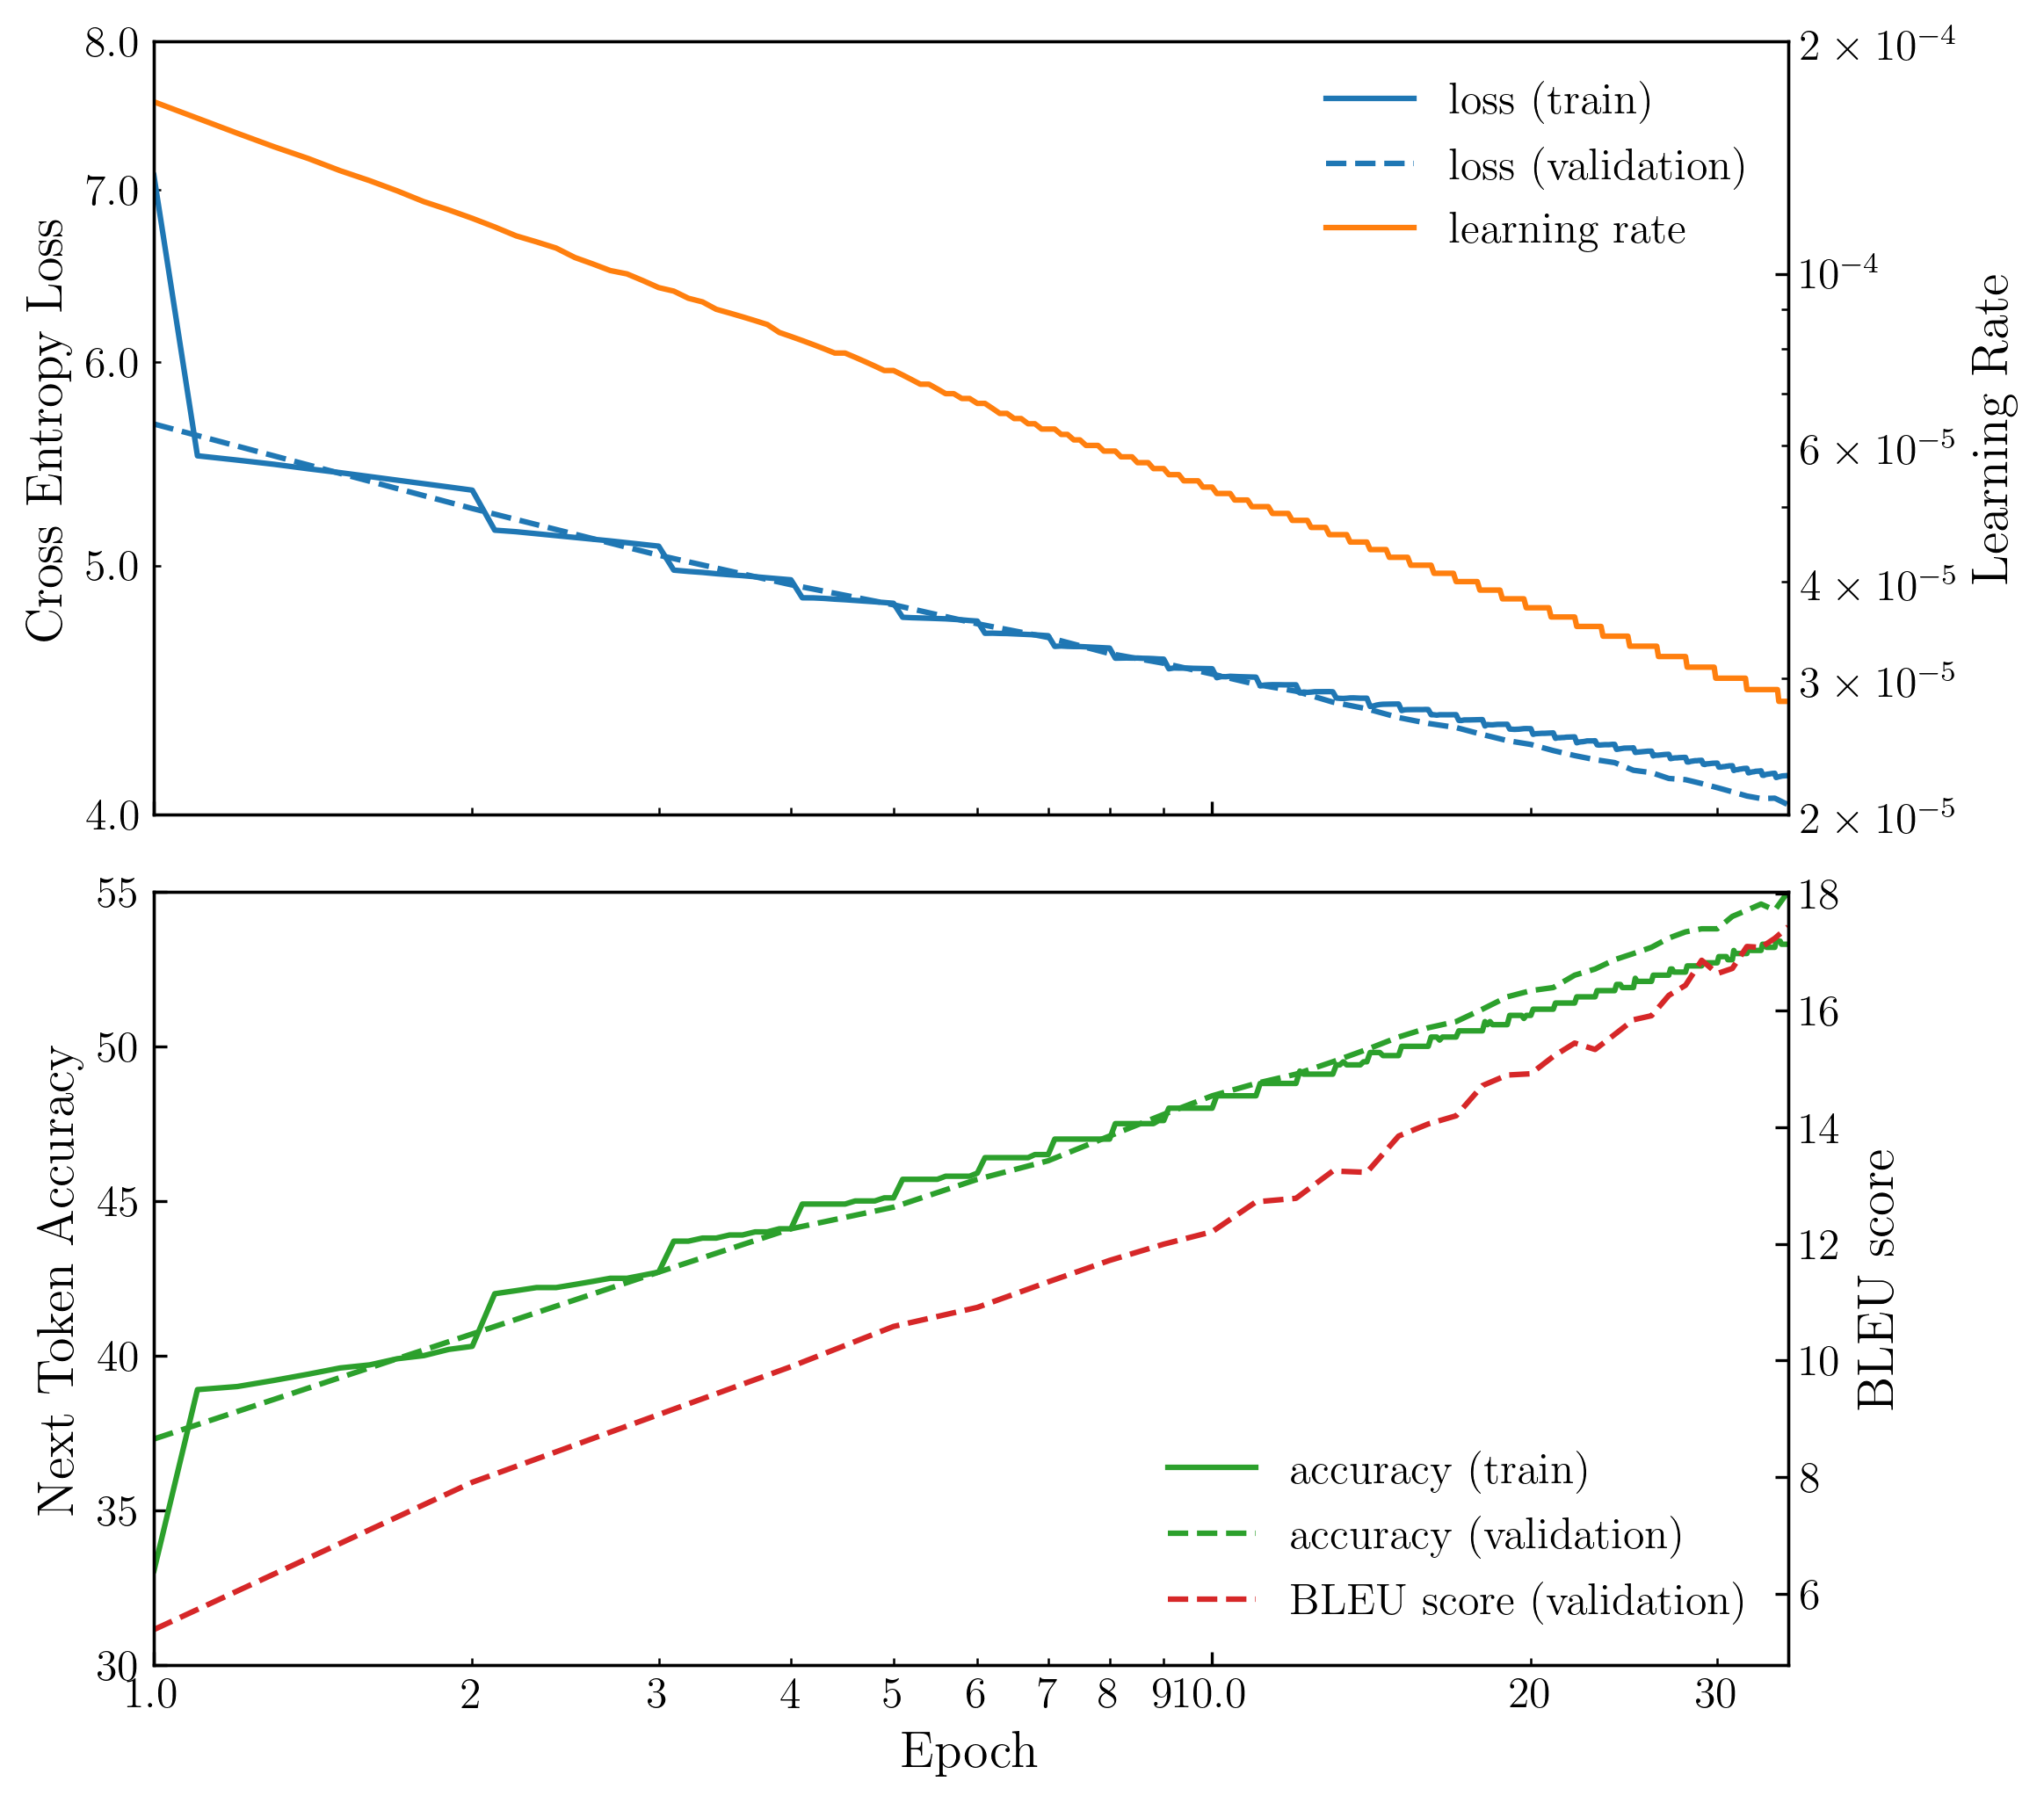

In [14]:
fig, ax = plt.subplots(2, 1, sharex=True, gridspec_kw={"hspace": 0.1})
ax[0].plot(epoch_train, loss_train, color="C0", linestyle="-")
ax[0].plot(epoch_valid, loss_valid, color="C0", linestyle="--")
ax[0].set_ylabel("Cross Entropy Loss")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_ylim([4, 8])
ax[0].set_xlim([1, 35])
ax0 = ax[0].twinx()
ax0.plot(epoch_train, lr, color="C1", linestyle="-")
ax0.set_ylabel("Learning Rate")
ax0.set_yscale("log")
ax0.legend(ax[0].get_lines() + ax0.get_lines(), ["loss (train)", "loss (validation)", "learning rate"])
ax0.set_ylim([2e-5, 2e-4])

ax[1].plot(epoch_train, accu_train, color="C2", linestyle="-")
ax[1].plot(epoch_valid, accu_valid, color="C2", linestyle="--")
ax[1].set_ylabel("Next Token Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylim([30, 55])
ax1 = ax[1].twinx()
ax1.plot(epoch_valid, bleu_valid, color="C3", linestyle="--")
ax1.set_ylabel("BLEU score")
ax1.legend(ax[1].get_lines() + ax1.get_lines(), ["accuracy (train)", "accuracy (validation)", "BLEU score (validation)"], loc="lower right")

ax[0].xaxis.set_major_formatter(ScalarFormatter())
ax[0].xaxis.set_minor_formatter(ScalarFormatter())
ax[0].yaxis.set_major_formatter(ScalarFormatter())
ax[0].yaxis.set_minor_formatter(ScalarFormatter())
# ax0.yaxis.set_major_formatter(ScalarFormatter())
# ax0.yaxis.set_minor_formatter(ScalarFormatter())

fig.savefig("base_wmt14_de-en.png", bbox_inches="tight")